In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df=pd.read_csv("C:/Users/aksha/OneDrive/Desktop/Projects/flight_data/final_flights_flagged.csv")
df.head()

,status,type,airline.iataCode,airline.name,arrival.actualTime,arrival.delay,arrival.estimatedTime,arrival.iataCode,arrival.scheduledTime,departure.actualTime,...,flight_type,flight_duration,arrival.delay_missing,departure.delay_missing,arrival.actualTime_missing,departure.actualTime_missing,arrival.estimatedTime_missing,departure.estimatedTime_missing,flight_duration_missing,total_delay_missing
0,active,departure,AI,Air India,NaN,NaN,NaN,DEL,2025-09-23 12:45:00,2025-09-23 11:04:00,...,Domestic,NaN,True,False,True,False,True,False,True,False
1,active,departure,BA,British Airways,NaN,NaN,NaN,TRV,2025-09-23 12:50:00,2025-09-23 11:22:00,...,Domestic,NaN,True,False,True,False,True,False,True,False
2,active,departure,VS,Virgin Atlantic,NaN,NaN,NaN,TRV,2025-09-23 12:50:00,2025-09-23 11:22:00,...,Domestic,NaN,True,False,True,False,True,False,True,False
3,active,departure,6E,IndiGo,NaN,NaN,NaN,TRV,2025-09-23 12:50:00,2025-09-23 11:22:00,...,Domestic,NaN,True,False,True,False,True,False,True,False
4,active,departure,6E,IndiGo,NaN,14.0,2025-09-23 12:53:00,TRZ,2025-09-23 12:40:00,2025-09-23 11:16:00,...,Domestic,NaN,False,False,True,False,False,False,True,False


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   status                           1035 non-null   object 
 1   type                             1035 non-null   object 
 2   airline.iataCode                 1035 non-null   object 
 3   airline.name                     1035 non-null   object 
 4   arrival.actualTime               248 non-null    object 
 5   arrival.delay                    107 non-null    float64
 6   arrival.estimatedTime            549 non-null    object 
 7   arrival.iataCode                 1035 non-null   object 
 8   arrival.scheduledTime            1035 non-null   object 
 9   departure.actualTime             555 non-null    object 
 10  departure.delay                  561 non-null    float64
 11  departure.estimatedTime          777 non-null    object 
 12  departure.iataCode  

In [126]:
for col in ['arrival.scheduledTime', 'arrival.estimatedTime', 'arrival.actualTime',
            'departure.scheduledTime', 'departure.estimatedTime', 'departure.actualTime']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [127]:
df['arrival.estimatedTime'] = df['arrival.estimatedTime'].fillna(df['arrival.scheduledTime'])
df['departure.estimatedTime'] = df['departure.estimatedTime'].fillna(df['departure.scheduledTime'])

In [128]:
df['arrival.actualTime'] = df['arrival.actualTime'].fillna(df['arrival.estimatedTime'])
df['departure.actualTime'] = df['departure.actualTime'].fillna(df['departure.estimatedTime'])

In [129]:
df['arrival.delay'] = np.nan
df['departure.delay'] = np.nan

In [130]:
# Arrival delay: calculate for arrival flights
df.loc[df['type']=='arrival', 'arrival.delay'] = (
    df.loc[df['type']=='arrival', 'arrival.actualTime'] - 
    df.loc[df['type']=='arrival', 'arrival.scheduledTime']
).dt.total_seconds() / 60

# Departure delay: calculate for departure flights
df.loc[df['type']=='departure', 'departure.delay'] = (
    df.loc[df['type']=='departure', 'departure.actualTime'] - 
    df.loc[df['type']=='departure', 'departure.scheduledTime']
).dt.total_seconds() / 60

In [131]:
df['total_delay'] = df['arrival.delay'].fillna(0) + df['departure.delay'].fillna(0)

In [132]:
df['flight_duration'] = None
mask = df['arrival.actualTime'].notna() & df['departure.actualTime'].notna()
df.loc[mask, 'flight_duration'] = (df.loc[mask, 'arrival.actualTime'] - df.loc[mask, 'departure.actualTime']).dt.total_seconds() / 60

In [133]:
df['arrival.delay_missing'].value_counts()
df['departure.delay_missing'].value_counts()

departure.delay_missing
False    561
True     474
Name: count, dtype: int64

In [134]:
df['type'].value_counts()

type
arrival      560
departure    475
Name: count, dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   status                           1035 non-null   object        
 1   type                             1035 non-null   object        
 2   airline.iataCode                 1035 non-null   object        
 3   airline.name                     1035 non-null   object        
 4   arrival.actualTime               1035 non-null   datetime64[ns]
 5   arrival.delay                    560 non-null    float64       
 6   arrival.estimatedTime            1035 non-null   datetime64[ns]
 7   arrival.iataCode                 1035 non-null   object        
 8   arrival.scheduledTime            1035 non-null   datetime64[ns]
 9   departure.actualTime             1035 non-null   datetime64[ns]
 10  departure.delay                  475 non-null    float64    

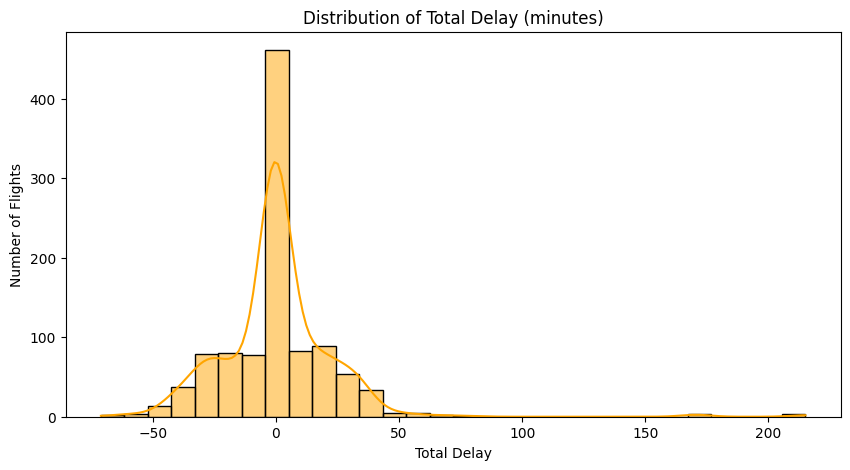

In [141]:
plt.figure(figsize=(10,5))
sns.histplot(df['total_delay'], bins=30, kde=True, color='orange')
plt.title("Distribution of Total Delay (minutes)")
plt.xlabel("Total Delay")
plt.ylabel("Number of Flights")
plt.show()

In [137]:
df['arrival_early_flag'] = df['arrival.delay'] < 0
df['departure_early_flag'] = df['departure.delay'] < 0

In [139]:
total_flights = len(df)
delayed_flights = (df['total_delay'] > 0).sum()
early_flights = df['arrival_early_flag'].sum() + df['departure_early_flag'].sum()
avg_delay = df['total_delay'].mean()
max_delay = df['total_delay'].max()
avg_duration = df['flight_duration'].mean()

In [140]:
print(f"Total Flights: {total_flights}")
print(f"Delayed Flights: {delayed_flights}")
print(f"Early Flights: {early_flights}")
print(f"Average Delay: {avg_delay:.1f} min")
print(f"Max Delay: {max_delay:.1f} min")
print(f"Average Flight Duration: {avg_duration:.1f} min")

Total Flights: 1035
Delayed Flights: 302
Early Flights: 317
Average Delay: 0.8 min
Max Delay: 215.0 min
Average Flight Duration: 134.9 min


In [143]:
hourly_delay = df.groupby('departure_hour')['total_delay'].mean().reset_index()
hourly_delay

,departure_hour,total_delay
0,0,0.000000
1,5,-31.000000
2,6,-20.000000
3,7,-34.714286
4,8,-21.611111
5,9,-26.147059
6,10,-8.217391
7,11,10.304878
8,12,16.383333
9,13,5.808824


In [144]:
top_airlines = df.groupby('airline.name')['total_delay'].mean().sort_values(ascending=False).head(10)
top_airlines

airline.name
Delta Air Lines       11.666667
Turkish Airlines      10.625000
Ethiopian Airlines    10.333333
Malaysia Airlines      6.428571
Air India Express      5.360000
Emirates               5.333333
British Airways        4.621622
American Airlines      4.500000
Star Air               4.000000
Vietnam Airlines       2.666667
Name: total_delay, dtype: float64

In [147]:
early_count = early_flights
late_count = delayed_flights
on_time = total_flights - (early_count + late_count)
print(f"Early Flights: {early_count}, Late Flights: {late_count}, Exactly On_Time: {on_time}")

Early Flights: 317, Late Flights: 302, Exactly On_Time: 416


In [149]:
df.to_csv("C:/Users/aksha/OneDrive/Desktop/Projects/flight_data/BOM_flights.csv")